# DeepForest Installation

In [2]:
#installing deepforest (Different from original as this gives ability to vary thickness of predictions)
! pip install git+https://github.com/weecology/deepforest.git@refs/pull/240/head

  Cloning https://github.com/weecology/deepforest.git (to revision refs/pull/240/head) to /tmp/pip-req-build-ppu2dl77
  Running command git clone -q https://github.com/weecology/deepforest.git /tmp/pip-req-build-ppu2dl77
  Running command git fetch -q https://github.com/weecology/deepforest.git refs/pull/240/head
  Running command git checkout -q a66f0fe05edcba4732c2be005e4b4478fbbac9a6
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 994 kB 63.7 MB/s 
     |████████████████████████████████| 19.3 MB 67 kB/s 
     |████████████████████████████████| 994 kB 67.1 MB/s 
     |████████████████████████████████| 916 kB 67.1 MB/s 
     |████████████████████████████████| 29.6 MB 24 kB/s 
     |████████████████████████████████| 631 kB 64.0 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.6 MB 60.9 MB/s 
     |████████████████████████████████| 829 kB 42.2 MB/s 
     |████████████████████████████

In [3]:
!pip install albumentations==0.4.6
import albumentations 

     |████████████████████████████████| 117 kB 7.3 MB/s 
     |████████████████████████████████| 948 kB 38.7 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=4f7765a3763c2f425c160bcd75764ce26dfeda602ddc387f72dc075c8b08ee24
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [4]:
from albumentations.pytorch import ToTensorV2

In [31]:
#load the modules
import os
import time
import numpy as np
from deepforest import main 
from deepforest import get_data
from deepforest import utilities
from deepforest import preprocess

In [39]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt
model = main.deepforest()
model.use_release()


Reading config file: /usr/local/lib/python3.7/dist-packages/deepforest/data/deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


# Original DeepForest model Result on Boston imagery 

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/deepforest/predict.py:34: UserWarning: Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn("Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')")
100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


180 predictions in overlapping windows, applying non-max supression
122 predictions kept after non-max suppression
Canopies detected according to trained model 53


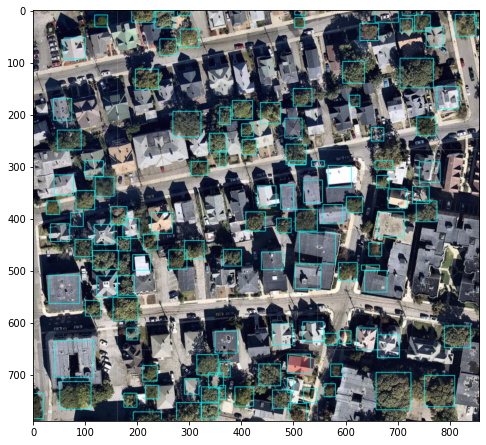

In [40]:

raster_path = get_data("/content/boston_mapbox1.JPG")
fig, axes, = plt.subplots(figsize=(8,8))

# Window size of 300px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=500,patch_overlap=0.25)
box= model.predict_image(path=raster_path,return_plot=False)

treecounttm=box.shape[0]

plt.imshow(predicted_raster[:,:,::-1])


print(f"Canopies detected according to trained model {treecounttm}")


# Loading Custom trained model (Model which trained on boston specific dataset)

In [41]:
#load the save model, trained on boston dataset
import torch
model = main.deepforest()
model_path='/content/drive/MyDrive/GSoC 2021 Final/70epchs.pth'#
model.model.load_state_dict(torch.load(model_path))

Reading config file: /usr/local/lib/python3.7/dist-packages/deepforest/data/deepforest_config.yml


<All keys matched successfully>

#Custom Trained model used for predictions: 

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/deepforest/predict.py:34: UserWarning: Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn("Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')")
100%|██████████| 6/6 [00:00<00:00, 10.47it/s]


265 predictions in overlapping windows, applying non-max supression
131 predictions kept after non-max suppression
Canopies detected according to trained model 52


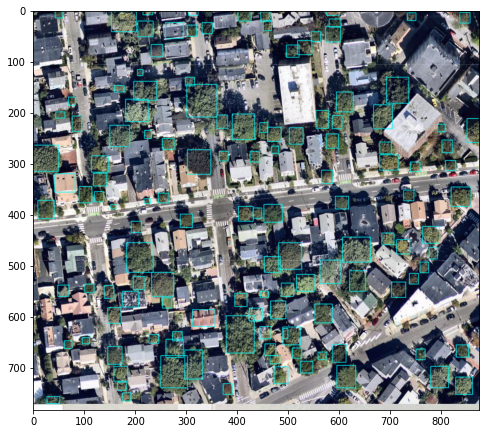

In [42]:
raster_path = get_data("/content/boston_mapbox.JPG")
# Window size of 300px with an overlap of 25% among windows for this small tile.
fig, axes, = plt.subplots(figsize=(8,8))
#axes = axes.flatten()
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=500,patch_overlap=0.25)
box= model.predict_image(path=raster_path,return_plot=False)

treecounttm=box.shape[0]
plt.imshow(predicted_raster[:,:,::-1])

print(f"Canopies detected according to trained model {treecounttm}")
